Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами

Потроить график Precision - Recall на этих же данных


In [38]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [40]:
X = data[data.columns[:-1]]
X.head(2)

Y = data['affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [41]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
predictions = model.predict_proba(X_test)

**Model2 to compare**

In [45]:
Xshort = X.loc[:, ['age', 'children']]
Xshort.head()
X_train_short, X_test_short, Y_train2, Y_test2 = train_test_split(Xshort, Y, test_size=0.3, random_state=0)

In [46]:
model2 = LogisticRegression()
model2.fit(X_train_short, Y_train2)

LogisticRegression()

In [47]:
predictions2 = model2.predict_proba(X_test_short)

In [48]:
roc_auc_score(Y_test, predictions[:, 1])

0.7451629176618145

In [49]:
roc_auc_score(Y_test2, predictions2[:, 1])

0.6311452091928271

Difference between auc https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [50]:
from sklearn.metrics import auc
# Receiver Operating Characteristic
from sklearn.metrics import roc_curve

In [51]:
# false and true positive rate
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [22]:
# for line in zip(fpr, tpr, thres):
#     print(line)

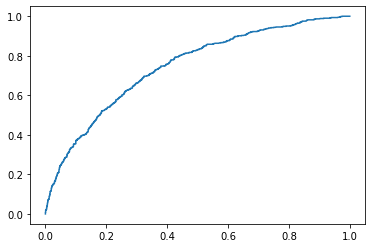

In [53]:
plt.plot(fpr, tpr)

In [54]:
fpr2, tpr2, thres2 = roc_curve(Y_test2, predictions2[:, 1])

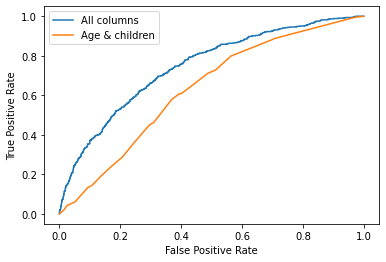

In [55]:
plt.plot( fpr, tpr, label='All columns')
plt.plot( fpr2, tpr2, label='Age & children')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

In [56]:
auc(fpr, tpr)

0.7451629176618145

In [57]:
auc(fpr2, tpr2)

0.6311452091928271

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels of the test set: y_pred
y_pred = model.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1172  131]
 [ 381  226]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1303
           1       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.64      1910
weighted avg       0.72      0.73      0.71      1910



In [59]:
y_pred2 = model2.predict(X_test_short)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(Y_test2, y_pred2))
print(classification_report(Y_test2, y_pred2))


[[1270   33]
 [ 581   26]]
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1303
           1       0.44      0.04      0.08       607

    accuracy                           0.68      1910
   macro avg       0.56      0.51      0.44      1910
weighted avg       0.61      0.68      0.57      1910



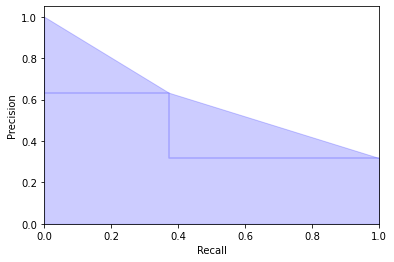

In [60]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.show()

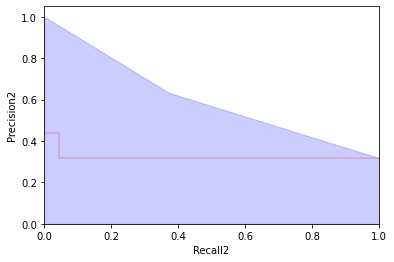

In [61]:
precision2, recall2, thresholds2 = precision_recall_curve(Y_test2, y_pred2)
plt.step(recall2, precision2, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall2')
plt.ylabel('Precision2')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.show()

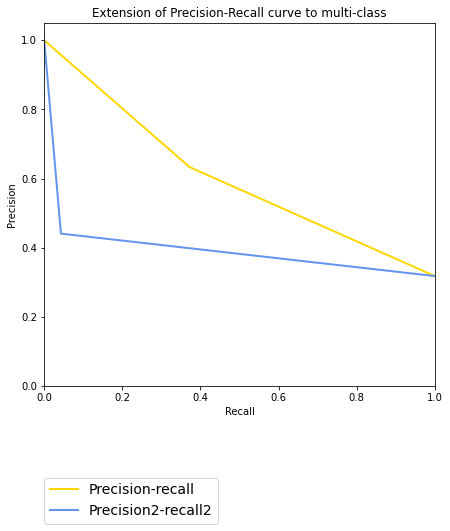

In [36]:
from itertools import cycle
colors = cycle(['gold', 'cornflowerblue'])

plt.figure(figsize=(7, 8))
labels = []
lines = []

labels.append('Precision-recall')
l, = plt.plot(recall, precision, color='gold', lw=2)
lines.append(l)

labels.append('Precision2-recall2')
l, = plt.plot(recall2, precision2, color='cornflowerblue', lw=2)
lines.append(l)

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()